In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_csv("shopping.csv")
datos

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
# VER DARTOS VACIOS DE NUESTRO DATAFRAME
datos.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# TRATAR DATOS DE NUESTRO - CONVERTIR DE STRING A INT XD
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
datos["Month"] = le.fit_transform(datos["Month"])
datos["VisitorType"] = le.fit_transform(datos["VisitorType"])
datos["Weekend"] = le.fit_transform(datos["Weekend"])
datos["Revenue"] = le.fit_transform(datos["Revenue"])

In [6]:
datos  # VEMOS QUE AHORA TODOS NUESTROS DATOS ESTAN EN INT 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


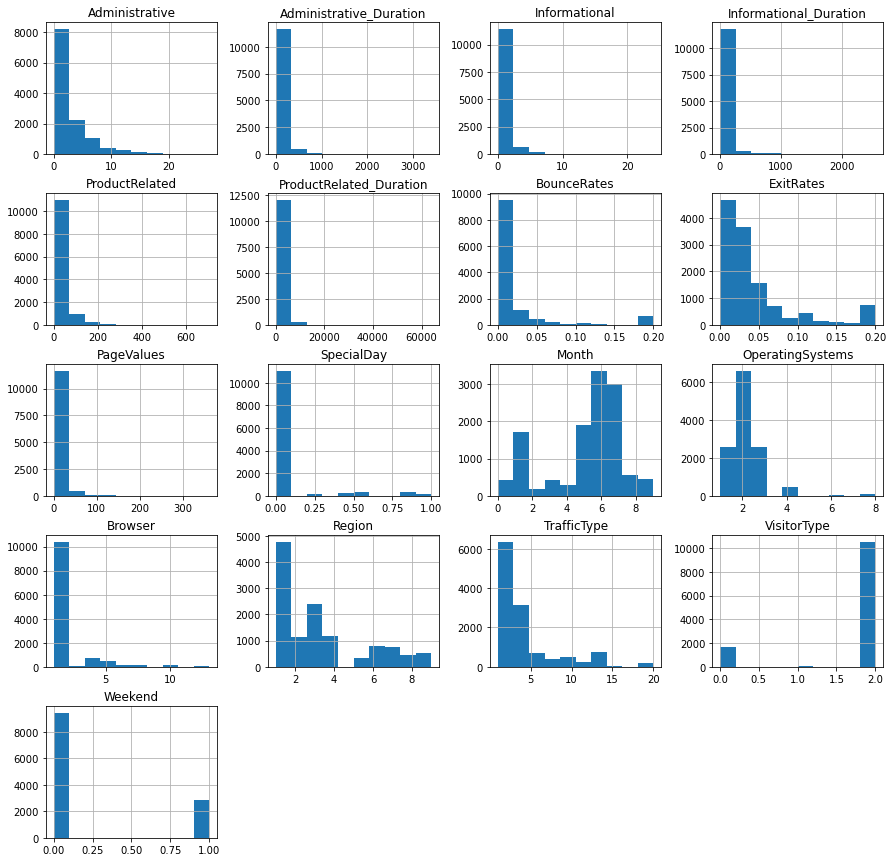

In [7]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (15, 15)        # TAMAÑO DEL GRÁFICO

datos.drop(['Revenue'],1).hist()
plt.show()

In [24]:
# NORMALIZAR LOS DATOS
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

datos_normalizados = mean_norm(datos.iloc[:,:17])
print(datos_normalizados)

       Administrative  Administrative_Duration  Informational  \
0           -0.696965                -0.457173      -0.396462   
1           -0.696965                -0.457173      -0.396462   
2           -0.696965                -0.457173      -0.396462   
3           -0.696965                -0.457173      -0.396462   
4           -0.696965                -0.457173      -0.396462   
...               ...                      ...            ...   
12325        0.206164                 0.363060      -0.396462   
12326       -0.696965                -0.457173      -0.396462   
12327       -0.696965                -0.457173      -0.396462   
12328        0.507207                -0.032915      -0.396462   
12329       -0.696965                -0.457173      -0.396462   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.244921       -0.690975                -0.624322   
1                   -0.244921       -0.668491                -0.590879 

In [25]:
""" ---------------------------------------------- PREDECIR PARA y = Revenue ----------------------------------------------"""

' ---------------------------------------------- PREDECIR PARA y = Revenue ----------------------------------------------'

In [28]:
# SELECCIONAR LAS COLUMNAS A TRABAJAR
X = datos_normalizados               # todas las columnas excepto la de Revenue
y = datos["Revenue"]                 # solo la columna Revenue

X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,-0.624322,3.667040,3.229185,-0.317165,-0.308809,-1.334905,-1.233376,-0.790261,-0.894142,-0.762598,0.407770,-0.550529
1,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.590879,-0.457664,1.171425,-0.317165,-0.308809,-1.334905,-0.136073,-0.207943,-0.894142,-0.514161,0.407770,-0.550529
2,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,-0.624322,3.667040,3.229185,-0.317165,-0.308809,-1.334905,2.058534,-0.790261,2.436983,-0.265725,0.407770,-0.550529
3,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.622929,0.573512,1.994529,-0.317165,-0.308809,-1.334905,0.961231,-0.207943,-0.477752,-0.017288,0.407770,-0.550529
4,-0.696965,-0.457173,-0.396462,-0.244921,-0.488617,-0.296418,-0.045194,0.142545,-0.317165,-0.308809,-1.334905,0.961231,0.374374,-0.894142,-0.017288,0.407770,1.816286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206164,0.363060,-0.396462,-0.244921,0.478208,0.307809,-0.310354,-0.288954,0.342111,-0.308809,-1.756810,2.058534,2.121326,-0.894142,-0.762598,0.407770,1.816286
12326,-0.696965,-0.457173,-0.396462,-0.244921,-0.601038,-0.380942,-0.457664,-0.447346,-0.317165,-0.308809,0.774622,0.961231,-0.207943,-0.894142,0.976459,0.407770,1.816286
12327,-0.696965,-0.457173,-0.396462,-0.244921,-0.578554,-0.528041,1.260962,0.897057,-0.317165,-0.308809,0.774622,0.961231,-0.207943,-0.894142,2.218643,0.407770,1.816286
12328,0.507207,-0.032915,-0.396462,-0.244921,-0.376195,-0.443518,-0.457664,-0.453122,-0.317165,-0.308809,0.774622,-0.136073,-0.207943,-0.061361,1.721770,0.407770,-0.550529


In [29]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
# REGRESION LOGISTICA
regresion_logistica = LogisticRegression()

In [32]:
# ENTRENANDO EL ALGORITMO
regresion_logistica.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# PREDICCIONES
y_pred = regresion_logistica.predict(X_test)

In [34]:
df_comparacion = pd.DataFrame({'ACTUAL': y_test, 'PREDICCION': y_pred})
df_comparacion.head(20)

,ACTUAL,PREDICCION
12263,0,0
6014,1,0
7605,0,0
5939,0,0
7109,0,0
5577,0,0
3400,0,0
4832,0,0
2979,0,0
7836,1,1


In [50]:
mi_prediccion = [[-0.094879, -0.327067, -0.396462, -0.244921, 
                  -0.443648, -0.475655, -0.457664, -0.592369,
                 -0.317165, -0.308809, -1.756811, -0.136073, 
                  -0.207943, -0.061361, -0.514161, 0.40777, -0.550529]]

In [51]:
predicion = regresion_logistica.predict(mi_prediccion)
print("NUESTRA PREDICCION: ", predicion)

NUESTRA PREDICCION:  [0]


In [19]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, recall_score
print(confusion_matrix(y_test, y_pred))

[[2064   36]
 [ 227  139]]


In [20]:
print("Exactitud del model        : ", accuracy_score(y_test, y_pred))   # y_pred = prediccion de y_test

Exactitud del model        :  0.8933495539334956


In [21]:
print("Sensibilidad del modelo    : ", recall_score(y_test, y_pred))

Sensibilidad del modelo    :  0.3797814207650273


In [22]:
print("Curva ROC - AUC del modelo : ", roc_auc_score(y_test, y_pred))

Curva ROC - AUC del modelo :  0.681319281811085


In [23]:
print("Puntaje F1 del modelo      : ", f1_score(y_test, y_pred))

Puntaje F1 del modelo      :  0.5138632162661737
